# Fit log curves for Dragut & Kang

Offline demo: use points in `literature_matrix.csv` → fit  
`y = a · log(b·x + 1)` → store parameters & plot.


In [1]:
import os, sys, pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

# allow 'src' imports
sys.path.append(os.path.abspath('..'))

from src.curves import fit_log_curve
from src.utils  import parse_curve   # already written earlier

df = pd.read_csv('../docs/literature_matrix.csv')
df[['Paper', 'Key Curve Data']].head()


,Paper,Key Curve Data
0,Dragut et al. 2019,0:0.58;30:0.72;60:0.78;120:0.80
1,Kang et al. 2023,0:0.65;100:0.76;300:0.81;600:0.83
2,Stiennon et al. 2021,0:0.0;5000:0.15;20000:0.24;40000:0.28
3,Strubell et al. 2019,GPUh:626 kWh ≈ 280 kg CO₂


Dragut fit  a=0.058  b=9106.3887  R²=-10.374


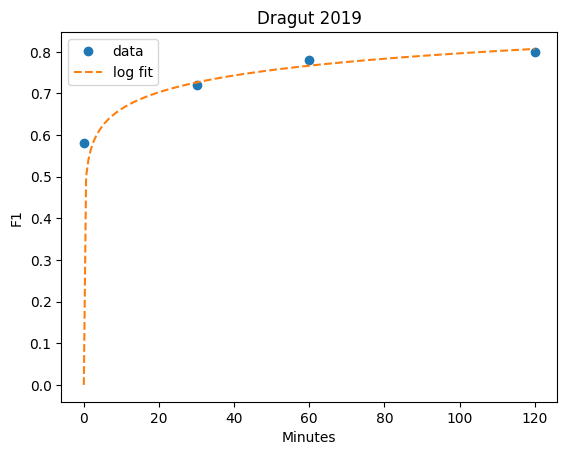

In [2]:
row_d = df[df['Paper'].str.contains('Dragut')].iloc[0]
x_d, y_d = zip(*parse_curve(row_d['Key Curve Data']))

a_d, b_d, r2_d = fit_log_curve(list(x_d), list(y_d))
print(f"Dragut fit  a={a_d:.3f}  b={b_d:.4f}  R²={r2_d:.3f}")

x_dense = np.linspace(0, max(x_d), 200)
y_fit   = a_d * np.log(b_d * x_dense + 1)

plt.plot(x_d, y_d, 'o', label='data')
plt.plot(x_dense, y_fit, '--', label='log fit')
plt.title('Dragut 2019')
plt.xlabel('Minutes'); plt.ylabel('F1'); plt.legend()
plt.savefig('../docs/figures/dragut_log_fit.png', dpi=150)
plt.show()


Kang fit    a=0.051  b=25569.7642  R²=-20.707


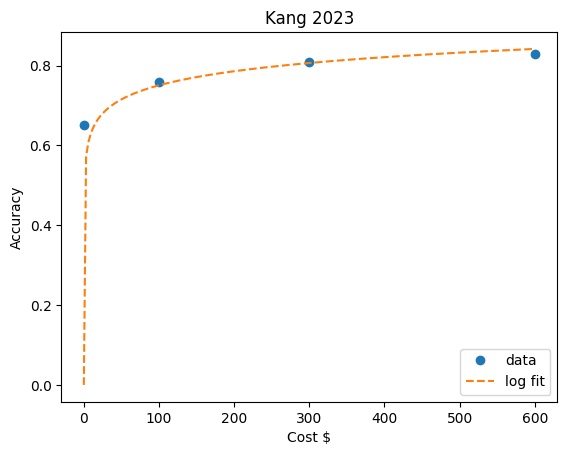

In [3]:
row_k = df[df['Paper'].str.contains('Kang')].iloc[0]
x_k, y_k = zip(*parse_curve(row_k['Key Curve Data']))

a_k, b_k, r2_k = fit_log_curve(list(x_k), list(y_k))
print(f"Kang fit    a={a_k:.3f}  b={b_k:.4f}  R²={r2_k:.3f}")

x_dense = np.linspace(0, max(x_k), 200)
plt.plot(x_k, y_k, 'o', label='data')
plt.plot(x_dense, a_k*np.log(b_k*x_dense + 1), '--', label='log fit')
plt.title('Kang 2023')
plt.xlabel('Cost $'); plt.ylabel('Accuracy'); plt.legend()
plt.savefig('../docs/figures/kang_log_fit.png', dpi=150)
plt.show()
